In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

# Indroduction

This project aims at predicting diamond price based on its features using regression models

Diamonds data set available on kaggle (https://www.kaggle.com/enashed/diamond-prices)

# Project Planning
1. Data exploration
2. Feature engineering
3. Data preprocessing for model
4. Basic model building
5. Model Tuning
6. Ensemble model building
7. Results

# Data Exploration

In [2]:
data = pd.read_csv("./diamonds_project/diamonds.csv")

In [3]:
X = data[data.columns.difference(['total_sales_price'])]
y = data["total_sales_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
X_train.head()

,clarity,color,culet_condition,culet_size,cut,date,depth_percent,diamond_id,eye_clean,fancy_color_dominant_color,...,girdle_min,lab,meas_depth,meas_length,meas_width,polish,shape,size,symmetry,table_percent
74310,VS1,H,NaN,N,Excellent,2022-02-24,62.2,126125195,NaN,NaN,...,M,IGI,2.83,4.53,4.60,Excellent,Round,0.36,Excellent,58.0
57889,IF,I,NaN,N,Excellent,2022-02-24,59.8,129158664,NaN,NaN,...,NaN,GIA,2.62,4.36,4.38,Excellent,Round,0.30,Excellent,61.0
205619,SI2,H,NaN,N,NaN,2022-02-24,61.3,129770287,NaN,NaN,...,STK,GIA,4.20,11.43,6.86,Excellent,Pear,2.01,Very Good,57.0
94768,SI2,H,NaN,NaN,NaN,2022-02-24,61.8,131704435,NaN,NaN,...,NaN,GIA,2.73,7.11,4.42,Very Good,Pear,0.50,Very Good,61.0
103851,SI1,E,NaN,NaN,NaN,2022-02-24,64.1,126265050,NaN,NaN,...,M,GIA,2.55,5.28,3.98,Excellent,Emerald,0.50,Excellent,67.0


In [5]:
y_train.head()

74310      1090
57889       980
205619    19683
94768      1422
103851     1750
Name: total_sales_price, dtype: int64

In [6]:
X_train.dtypes

clarity                         object
color                           object
culet_condition                 object
culet_size                      object
cut                             object
date                            object
depth_percent                  float64
diamond_id                       int64
eye_clean                       object
fancy_color_dominant_color      object
fancy_color_intensity           object
fancy_color_overtone            object
fancy_color_secondary_color     object
fluor_color                     object
fluor_intensity                 object
girdle_max                      object
girdle_min                      object
lab                             object
meas_depth                     float64
meas_length                    float64
meas_width                     float64
polish                          object
shape                           object
size                           float64
symmetry                        object
table_percent            

In [7]:
X_train.shape

(164778, 26)

In [8]:
X_train.columns

Index(['clarity', 'color', 'culet_condition', 'culet_size', 'cut', 'date',
       'depth_percent', 'diamond_id', 'eye_clean',
       'fancy_color_dominant_color', 'fancy_color_intensity',
       'fancy_color_overtone', 'fancy_color_secondary_color', 'fluor_color',
       'fluor_intensity', 'girdle_max', 'girdle_min', 'lab', 'meas_depth',
       'meas_length', 'meas_width', 'polish', 'shape', 'size', 'symmetry',
       'table_percent'],
      dtype='object')

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 74310 to 151617
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   clarity                      164778 non-null  object 
 1   color                        157834 non-null  object 
 2   culet_condition              11483 non-null   object 
 3   culet_size                   100439 non-null  object 
 4   cut                          119207 non-null  object 
 5   date                         164778 non-null  object 
 6   depth_percent                164778 non-null  float64
 7   diamond_id                   164778 non-null  int64  
 8   eye_clean                    46990 non-null   object 
 9   fancy_color_dominant_color   6945 non-null    object 
 10  fancy_color_intensity        6944 non-null    object 
 11  fancy_color_overtone         1525 non-null    object 
 12  fancy_color_secondary_color  797 non-null     object 


In [10]:
X_train.isnull().sum() / X_train.shape[0] * 100

clarity                         0.000000
color                           4.214155
culet_condition                93.031230
culet_size                     39.045868
cut                            27.655998
date                            0.000000
depth_percent                   0.000000
diamond_id                      0.000000
eye_clean                      71.482844
fancy_color_dominant_color     95.785238
fancy_color_intensity          95.785845
fancy_color_overtone           99.074512
fancy_color_secondary_color    99.516319
fluor_color                    92.864339
fluor_intensity                 0.061901
girdle_max                     38.421998
girdle_min                     38.034204
lab                             0.000000
meas_depth                      0.000000
meas_length                     0.000000
meas_width                      0.000000
polish                          0.000000
shape                           0.000000
size                            0.000000
symmetry        

In [11]:
nb_columns = ['size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

In [12]:
cat_columns = ['shape', 'color', 'clarity', 'symmetry', 'polish',  'fluor_intensity', 'lab']

In [13]:
X_train.describe()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent
count,164778.000000,1.647780e+05,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000
mean,61.668368,1.280813e+08,3.279965,5.549836,5.135693,0.755813,57.745833
std,9.962626,1.325918e+07,1.968979,1.767911,1.377796,0.849123,9.980466
min,0.000000,9.666855e+06,0.000000,0.000000,0.000000,0.080000,0.000000
25%,61.200000,1.275632e+08,2.680000,4.350000,4.310000,0.310000,57.000000
50%,62.400000,1.325788e+08,3.030000,5.060000,4.800000,0.500000,58.000000
75%,63.500000,1.348484e+08,3.630000,6.350000,5.700000,1.000000,60.000000
max,98.700000,1.361475e+08,76.300000,93.660000,62.100000,19.350000,94.000000


In [14]:
X_train.color.unique()

array(['H', 'I', 'E', nan, 'D', 'F', 'J', 'K', 'G', 'M', 'L'],
      dtype=object)

In [15]:
X_train['shape'].unique()

array(['Round', 'Pear', 'Emerald', 'Cushion Modified', 'Radiant', 'Heart',
       'Oval', 'Princess', 'Marquise', 'Asscher', 'Cushion'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


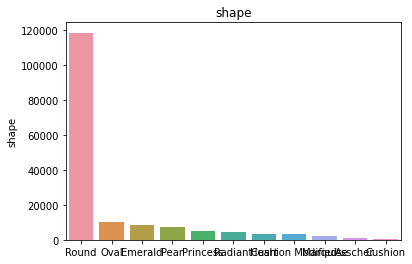

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


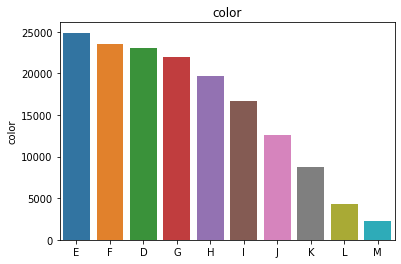

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


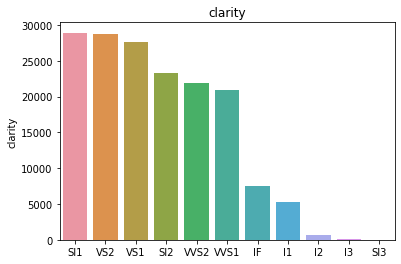

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


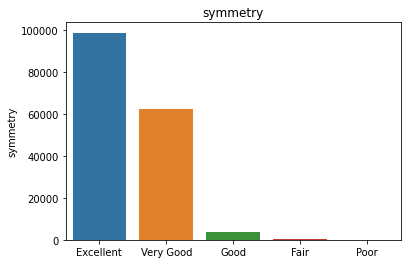

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


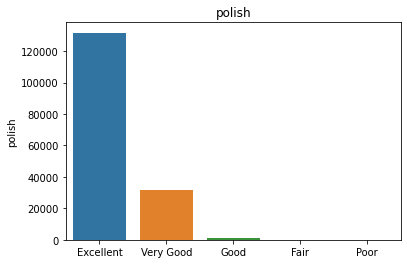

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


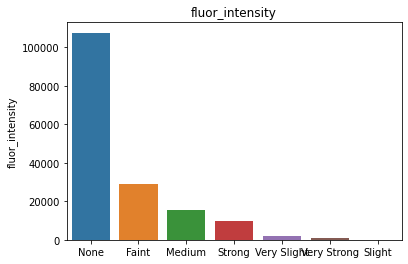

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


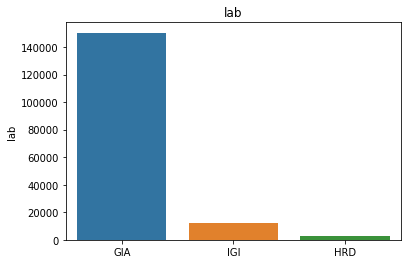

In [16]:
for name in cat_columns:
    sbn.barplot(X_train[name].value_counts().index, X_train[name].value_counts()).set_title(name)
    plt.show()

In [17]:
full_training_set = X_train.copy()
full_training_set["total_sales_price"] = y_train.copy()

full_training_set.groupby(["clarity"])['total_sales_price'].mean()

clarity
I1       5894.668586
I2       4250.150070
I3       4607.955882
IF      10153.712905
SI1      6473.069172
SI2      6680.146377
SI3       412.500000
VS1      7825.020497
VS2      7557.851068
VVS1     5735.898636
VVS2     6289.128629
Name: total_sales_price, dtype: float64

In [18]:
full_training_set.groupby(["color"])['total_sales_price'].mean()

color
D    6262.913292
E    5376.618657
F    5602.226210
G    7258.723375
H    7606.422709
I    6874.744427
J    6484.017373
K    6448.594625
L    5821.422806
M    5716.905594
Name: total_sales_price, dtype: float64

*color values are coded E been nearly colorless to M been Light Yellow color*

Refer to the link for more info https://australiandiamondimporters.com.au/colour/

In [19]:
full_training_set['date'].unique()

array(['2022-02-24'], dtype=object)

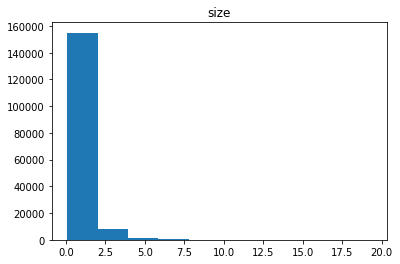

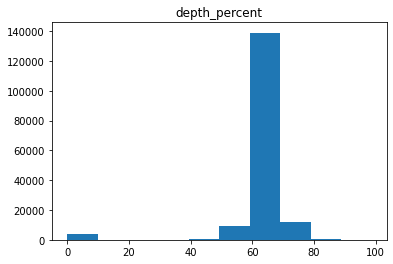

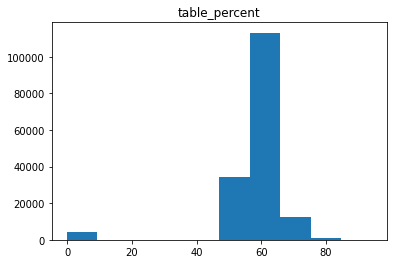

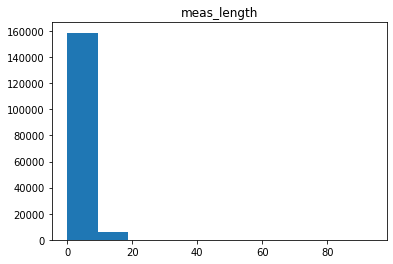

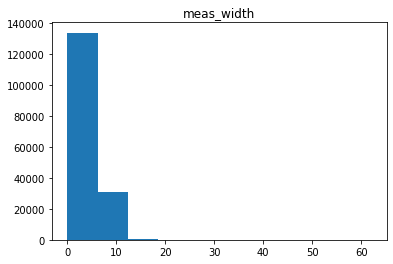

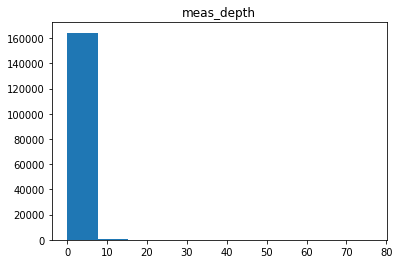

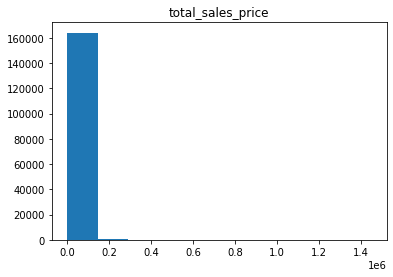

In [20]:
for name in nb_columns:
    plt.hist(full_training_set[name])
    plt.title(name)
    plt.show()

                       size  depth_percent  table_percent  meas_length  \
size               1.000000       0.061147       0.091104     0.780232   
depth_percent      0.061147       1.000000       0.677692     0.130231   
table_percent      0.091104       0.677692       1.000000     0.168407   
meas_length        0.780232       0.130231       0.168407     1.000000   
meas_width         0.787252       0.123060       0.145844     0.782265   
meas_depth         0.364944       0.090521       0.086836     0.355996   
total_sales_price  0.745528       0.025171       0.044689     0.486182   

                   meas_width  meas_depth  total_sales_price  
size                 0.787252    0.364944           0.745528  
depth_percent        0.123060    0.090521           0.025171  
table_percent        0.145844    0.086836           0.044689  
meas_length          0.782265    0.355996           0.486182  
meas_width           1.000000    0.430008           0.505291  
meas_depth           0.430008

<AxesSubplot:>

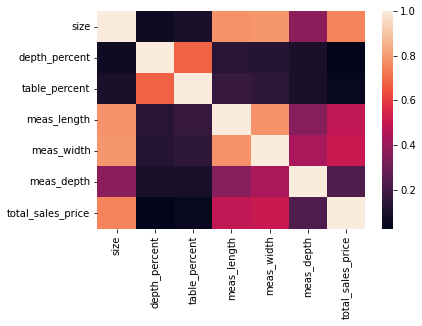

In [21]:
corr = full_training_set[nb_columns].corr()
print(corr)
sbn.heatmap(corr)

In [22]:
pd.pivot_table(full_training_set, index="color", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
color,,,,,,
D,61.196755,3.090659,5.284690,0.601973,57.722224,6262.913292
E,61.524282,3.050521,5.132236,0.577178,57.760199,5376.618657
F,61.812367,3.100576,5.241649,0.618891,58.026152,5602.226210
G,61.765906,3.315416,5.542702,0.739652,57.824217,7258.723375
H,61.664441,3.402448,5.692945,0.810972,57.942694,7606.422709
I,61.526801,3.427996,5.756670,0.838132,57.745618,6874.744427
J,61.821791,3.507761,5.919390,0.900769,57.909855,6484.017373
K,61.722717,3.485490,5.923930,0.947189,57.505245,6448.594625
L,61.740662,3.577912,6.072712,1.013806,57.506103,5821.422806


In [23]:
pd.pivot_table(full_training_set, index="cut", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
cut,,,,,,
Excellent,60.685046,3.198496,5.096857,0.624832,56.484350,5466.554413
Fair,63.320000,3.728000,5.866000,0.878000,61.100000,2848.600000
Good,61.952632,3.894737,7.393684,1.406316,59.368421,8682.315789
None,67.400000,3.020000,8.580000,0.700000,56.500000,966.000000
Very Good,60.793780,3.270421,5.071101,0.624323,56.282846,4085.083148


## Observations:

### Missing values
- fancy_color columns, culet_condition, fluor_color and eye_clean columns have more than 70% missing values so I will discard them for this analysis
- cut, girdle_min, girdle_max and culet_size has around 30% missing values might be removed
- fluor_intensity, color have really small missing value that need to be handled

### Feature
- Round shape diamond are dominant
- most diamonds tends to be colorless color
- prices from 200 USD -> 1.4M USD (excluding taxes)
- date has only one value feb 2022 can be discarded
- price is mostly correlated to size meas_width, meas_length
- clarity feature seems to impact the price as well

   # Feature enginnering
   

In [24]:
print(X_train.columns)
X_train_simplify = X_train.drop(columns = ["fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "culet_condition", "fluor_color", "eye_clean", "date", "girdle_min", "girdle_max", "culet_size", "cut"]).copy()

Index(['clarity', 'color', 'culet_condition', 'culet_size', 'cut', 'date',
       'depth_percent', 'diamond_id', 'eye_clean',
       'fancy_color_dominant_color', 'fancy_color_intensity',
       'fancy_color_overtone', 'fancy_color_secondary_color', 'fluor_color',
       'fluor_intensity', 'girdle_max', 'girdle_min', 'lab', 'meas_depth',
       'meas_length', 'meas_width', 'polish', 'shape', 'size', 'symmetry',
       'table_percent'],
      dtype='object')


In [25]:
X_train_simplify.columns

Index(['clarity', 'color', 'depth_percent', 'diamond_id', 'fluor_intensity',
       'lab', 'meas_depth', 'meas_length', 'meas_width', 'polish', 'shape',
       'size', 'symmetry', 'table_percent'],
      dtype='object')

In [26]:
X_train_simplify["is_expensive"] = y_train.apply(lambda x: 1 if x > y_train.mean() else 0)

In [27]:
X_train_simplify

,clarity,color,depth_percent,diamond_id,fluor_intensity,lab,meas_depth,meas_length,meas_width,polish,shape,size,symmetry,table_percent,is_expensive
74310,VS1,H,62.2,126125195,None,IGI,2.83,4.53,4.60,Excellent,Round,0.36,Excellent,58.0,0
57889,IF,I,59.8,129158664,None,GIA,2.62,4.36,4.38,Excellent,Round,0.30,Excellent,61.0,0
205619,SI2,H,61.3,129770287,None,GIA,4.20,11.43,6.86,Excellent,Pear,2.01,Very Good,57.0,1
94768,SI2,H,61.8,131704435,Medium,GIA,2.73,7.11,4.42,Very Good,Pear,0.50,Very Good,61.0,0
103851,SI1,E,64.1,126265050,None,GIA,2.55,5.28,3.98,Excellent,Emerald,0.50,Excellent,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42256,VS2,I,60.5,126456321,None,GIA,2.63,4.33,4.36,Excellent,Round,0.31,Excellent,61.0,0
62938,I1,J,60.0,128426264,Medium,GIA,3.14,5.22,5.26,Excellent,Round,0.52,Excellent,60.0,0
15436,VS1,E,62.2,122291468,None,GIA,2.32,3.72,3.75,Excellent,Round,0.20,Excellent,58.0,0
65547,VVS2,E,61.5,131707249,None,GIA,2.64,4.28,4.30,Very Good,Round,0.30,Excellent,57.0,0


In [28]:
pd.pivot_table(X_train_simplify, index="is_expensive", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth"])

,depth_percent,meas_depth,meas_length,size,table_percent
is_expensive,,,,,
0,61.355997,2.968809,4.976278,0.482071,57.288417
1,62.916223,4.522965,7.841074,1.849355,59.573115


In [29]:
X_full_train_simplify = X_train_simplify.copy()
X_full_train_simplify["total_sales_price"] = y_train.copy()

In [30]:
print(pd.pivot_table(X_full_train_simplify, index="is_expensive", columns="color", values="total_sales_price"))

color                    D             E             F             G  \
is_expensive                                                           
0              1912.736569   1748.634948   1901.708156   2135.688811   
1             28308.453137  26194.802382  24958.782183  25708.098636   

color                   H             I             J             K  \
is_expensive                                                          
0              2261.41457   2168.487881   2109.500752   1929.670674   
1             25491.23337  23974.186652  23005.732853  27599.263260   

color                    L             M  
is_expensive                              
0              2079.329655   2175.788991  
1             23987.023352  20801.248276  


In [31]:
X_train_simplify["is_big"] = X_train_simplify["size"].apply(lambda x: 1 if x > X_train_simplify["size"].mean() else 0)

In [32]:
X_full_train_simplify = X_train_simplify.copy()
X_full_train_simplify["total_sales_price"] = y_train.copy()
X_full_train_simplify.groupby(['is_big']).mean()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent,is_expensive,total_sales_price
is_big,,,,,,,,,
0,61.137076,1.293296e+08,2.844380,4.729372,4.507253,0.404563,56.995008,0.006538,1715.645055
1,62.890857,1.252092e+08,4.282232,7.437700,6.581716,1.564031,59.473463,0.645839,18951.184963


### Data cleaning

In [33]:
X_train_simplify.info()
X_train_simplify.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 74310 to 151617
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   clarity          164778 non-null  object 
 1   color            157834 non-null  object 
 2   depth_percent    164778 non-null  float64
 3   diamond_id       164778 non-null  int64  
 4   fluor_intensity  164676 non-null  object 
 5   lab              164778 non-null  object 
 6   meas_depth       164778 non-null  float64
 7   meas_length      164778 non-null  float64
 8   meas_width       164778 non-null  float64
 9   polish           164778 non-null  object 
 10  shape            164778 non-null  object 
 11  size             164778 non-null  float64
 12  symmetry         164778 non-null  object 
 13  table_percent    164778 non-null  float64
 14  is_expensive     164778 non-null  int64  
 15  is_big           164778 non-null  int64  
dtypes: float64(6), int64(3), object(7)

clarity               0
color              6944
depth_percent         0
diamond_id            0
fluor_intensity     102
lab                   0
meas_depth            0
meas_length           0
meas_width            0
polish                0
shape                 0
size                  0
symmetry              0
table_percent         0
is_expensive          0
is_big                0
dtype: int64

In [34]:
X_full_train_simplify.groupby(['color']).count()

X_train_simplify.color = X_train_simplify.color.fillna("E") #fill color with most common one

In [35]:
X_full_train_simplify = X_train_simplify.copy()
X_full_train_simplify["total_sales_price"] = y_train.copy()

X_full_train_simplify.groupby(['fluor_intensity']).count()
X_train_simplify.fluor_intensity = X_train_simplify.fluor_intensity.fillna("Faint") #fill Faint most common one

### Data preparation

<AxesSubplot:>

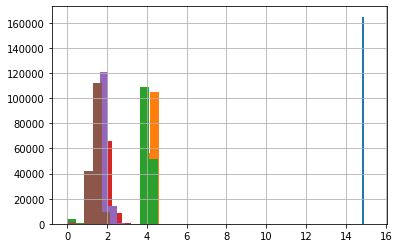

In [36]:
#normalized keeping value in a short range

#normalized log norm of size
X_train_simplify['norm_size'] =np.log(X_train_simplify.size + 1)
X_train_simplify['norm_size'].hist()

#normalized log of depth_percent
X_train_simplify["norm_depth_percent"] = np.log(X_train_simplify.depth_percent + 1)
X_train_simplify["norm_depth_percent"].hist()

#normalized log of meas_depth
X_train_simplify["norm_table_percent"] = np.log(X_train_simplify.table_percent + 1)
X_train_simplify["norm_table_percent"].hist()

#normalized log of meas_length
X_train_simplify["norm_meas_length"] = np.log(X_train_simplify.meas_length + 1)
X_train_simplify["norm_meas_length"].hist()

#normalized log of meas_width
X_train_simplify["norm_meas_width"] = np.log(X_train_simplify.meas_width + 1)
X_train_simplify["norm_meas_width"].hist()

#normalized log of meas_depth
X_train_simplify["norm_meas_depth"] = np.log(X_train_simplify.meas_depth + 1)
X_train_simplify["norm_meas_depth"].hist()


In [37]:
X_train_dummmies = pd.get_dummies(X_train_simplify[['norm_size', 'norm_depth_percent', 'norm_table_percent', 'norm_meas_length', 'norm_meas_width', 'norm_meas_depth', 'shape', 'color', 'clarity', 'symmetry', 'polish', 'fluor_intensity', 'lab', 'is_big', 'is_expensive']])

In [38]:
X_train_dummmies.head(100)

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,is_big,is_expensive,shape_Asscher,shape_Cushion,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
74310,14.784943,4.146304,4.077537,1.710188,1.722767,1.342865,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
57889,14.784943,4.107590,4.127134,1.678964,1.682688,1.286474,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
205619,14.784943,4.131961,4.060443,2.520113,2.061787,1.648659,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
94768,14.784943,4.139955,4.127134,2.093098,1.690096,1.316408,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
103851,14.784943,4.175925,4.219508,1.837370,1.605430,1.266948,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62835,14.784943,4.144721,0.000000,1.654411,1.660131,1.291984,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
210316,14.784943,4.218036,4.143135,2.422144,2.122262,1.778336,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
121198,14.784943,4.279440,4.204693,1.654411,1.615420,1.353255,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
125664,14.784943,4.198705,4.158883,1.894617,1.660131,1.332366,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [39]:
#scaling (keeping numeric value in normal distribution)
scale = StandardScaler()

In [40]:
X_train_dummmies_scaled = X_train_dummmies.copy()
X_train_dummmies_scaled[["norm_size", "norm_depth_percent", "norm_table_percent", "norm_meas_length", "norm_meas_width", "norm_meas_depth"]] = scale.fit_transform(X_train_dummmies_scaled[["norm_size", "norm_depth_percent", "norm_table_percent", "norm_meas_length", "norm_meas_width", "norm_meas_depth"]])
X_train_dummmies_scaled

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,is_big,is_expensive,shape_Asscher,shape_Cushion,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
74310,1.776357e-15,0.129933,0.128830,-0.484122,-0.263793,-0.344912,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
57889,1.776357e-15,0.065591,0.208351,-0.596803,-0.426578,-0.589075,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
205619,1.776357e-15,0.106095,0.101421,2.438756,1.113192,0.979130,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
94768,1.776357e-15,0.119380,0.208351,0.897734,-0.396491,-0.459465,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
103851,1.776357e-15,0.179160,0.356458,-0.025144,-0.740376,-0.673622,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42256,1.776357e-15,0.084616,0.208351,-0.617059,-0.441705,-0.577131,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
62938,1.776357e-15,0.071049,0.182280,-0.059789,0.188731,-0.007915,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
15436,1.776357e-15,0.129933,0.128830,-1.055684,-0.932433,-0.963648,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
65547,1.776357e-15,0.111422,0.101421,-0.651072,-0.487428,-0.565219,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [41]:
X_train = X_train_dummmies_scaled.copy()
X_train.describe()

,norm_size,norm_depth_percent,norm_table_percent,norm_meas_length,norm_meas_width,norm_meas_depth,is_big,is_expensive,shape_Asscher,shape_Cushion,...,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong,lab_GIA,lab_HRD,lab_IGI
count,1.647780e+05,1.647780e+05,1.647780e+05,1.647780e+05,1.647780e+05,1.647780e+05,164778.000000,164778.000000,164778.000000,164778.000000,...,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000
mean,1.776357e-15,-2.331995e-16,1.253146e-15,-6.970544e-17,1.286381e-15,-3.410780e-16,0.302941,0.200209,0.007604,0.002349,...,0.175782,0.093981,0.652830,0.000061,0.060063,0.012368,0.004916,0.912652,0.015354,0.071994
std,0.000000e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.459531,0.400158,0.086870,0.048406,...,0.380636,0.291803,0.476072,0.007790,0.237604,0.110523,0.069940,0.282345,0.122957,0.258478
min,1.776357e-15,-6.761040e+00,-6.408899e+00,-6.655891e+00,-7.261092e+00,-6.159317e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.776357e-15,1.034255e-01,1.014214e-01,-6.035425e-01,-4.797715e-01,-5.178982e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.776357e-15,1.351836e-01,1.288298e-01,-1.538350e-01,-1.212643e-01,-1.245155e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.776357e-15,1.637715e-01,1.822798e-01,5.426340e-01,4.646291e-01,4.764267e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.776357e-15,8.875538e-01,8.925697e-01,9.765317e+00,9.573370e+00,1.266555e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Basic model building

## Algorithms selection (regression)
1. LinearRegression
2. SGDRegressor
3. ElasticNet
4. Lasso
5. SVR (Support Vector Regression)

In [42]:
lr = LinearRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.20199179 0.18465625 0.19987767 0.18362621 0.19962679]
0.19395574242192032


In [43]:
sgd = SGDRegressor()
cv = cross_val_score(sgd, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.20239601 0.18136553 0.1966172  0.17771869 0.19783255]
0.19118599573431858


In [44]:
en = ElasticNet(random_state=0)
cv = cross_val_score(en, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.17313131 0.15859819 0.16987969 0.15682196 0.16987835]
0.16566190083226764


In [45]:
lasso = Lasso(alpha=0.1)
cv = cross_val_score(lasso, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.155e+12, tolerance: 9.397e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.631e+12, tolerance: 8.911e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.009e+12, tolerance: 9.257e+09

[0.20200858 0.18474647 0.19988497 0.18360235 0.19979264]
0.1940070035612623


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.824e+12, tolerance: 9.065e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
svr = SVR()
cv = cross_val_score(svr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())